In [1]:
### https://sgugger.github.io/convolution-in-depth.html
### https://medium.com/towards-data-science/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
import os
import numpy as np
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import SubsetRandomSampler

# 1. CIFAR10 public dataset download (image classification)
# 2. Download/extract/load dataset using torchvision
# 3. Show random batches of images in a grid using torchvision.utils.make_grid
# 4. Create CNN using nn.Conv2d & nn.MaxPool2d layers
# 5. Capture dataset info, metric , hyperparameters
# 6. Train CNN and visualize losses & errors
# 7. Ascertain overfitting and strategies for avoiding
# 8. Generate predictions on single images form test set
# 9. Save & Load model weights, and attach to experiment snapshot

# 10. Change hyperparameters for higher accuracy within fewer epochs
# 11. Add more convolution layers or increase number of channels in each Conv layer
# 12. Try feedforward neural network & maximum accuracy
# 13.

dataset_url = "http://files.fast.ai/data/examples/cifar10.tgz"
download_url(dataset_url, '.')

with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')
data_dir = './data/cifar10'
print(os.listdir(data_dir))
print('')
print(os.listdir(data_dir + '/train'))
print('')
print(os.listdir(data_dir + '/test'))
# dataset with 2 folders train and test, 50,000 and 10,000. Both contain 10 folders one for each class of images.
# ['train', 'test', 'labels.txt']
# ['frog', 'ship', 'bird', 'horse', 'deer', 'airplane', 'truck', 'cat', 'automobile', 'dog']
# ['frog', 'ship', 'bird', 'horse', 'deer', 'airplane', 'truck', 'cat', 'automobile', 'dog']


100%|██████████| 168M/168M [00:00<00:00, 215MB/s]


['test', 'labels.txt', 'train']

['ship', 'bird', 'automobile', 'airplane', 'cat', 'frog', 'truck', 'deer', 'dog', 'horse']

['ship', 'bird', 'automobile', 'airplane', 'cat', 'frog', 'truck', 'deer', 'dog', 'horse']


In [2]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No of training examples of airplanes:', len(airplane_files))
print(airplane_files[:5])
# No of training examples of airplanes: 5000
# ['35548_airplane.png', '3042_airplane.png', '48424_airplane.png', '37199_airplane.png', '13716_airplane.png']

No of training examples of airplanes: 5000
['3979_airplane.png', '32232_airplane.png', '39863_airplane.png', '42199_airplane.png', '2707_airplane.png']


In [3]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print('No of Test examples of ships:', len(ship_test_files))
print(ship_test_files[:5])
# No of Test examples of ships: 1000
# ['9279_ship.png', '120_ship.png', '7320_ship.png', '8239_ship.png', '7580_ship.png']

No of Test examples of ships: 1000
['199_ship.png', '9600_ship.png', '1358_ship.png', '1499_ship.png', '4316_ship.png']


In [4]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())
img, label = dataset[0]
print(img.shape, label)
img
# torch.Size([3, 32, 32]) 0
# tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
#          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],

torch.Size([3, 32, 32]) 0


tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
         [0.9686, 0.9686, 0.9765,  ..., 0.9569, 0.9529, 0.

In [5]:
print(dataset.classes)
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Label:  airplane (0)


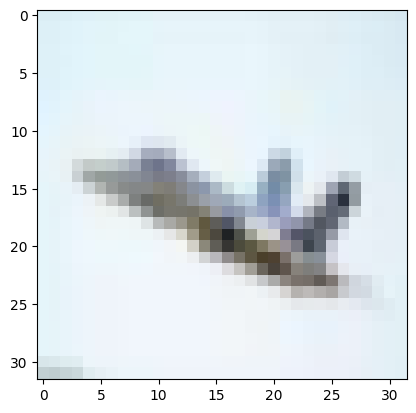

In [6]:
import matplotlib.pyplot as plt
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
show_example(*dataset[0])


In [7]:
# Set aside small part of training set for validation
def split_indices(n, val_pct=0.1, seed=99):
    n_val = int(val_pct * n)
    np.random.seed(seed)
    idxs = np.random.permutation(n) #permutation of 0 to n-1
    return idxs[n_val:], idxs[:n_val]

val_pct = 0.2
rand_seed = 42
train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
print(len(train_indices), len(val_indices))
print('Sample validation indices: ', val_indices[:10])

40000 10000
Sample validation indices:  [33553  9427   199 12447 39489 42724 10822 49498  4144 36958]


In [8]:
batch_size = 100
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, batch_size, sampler=val_sampler)

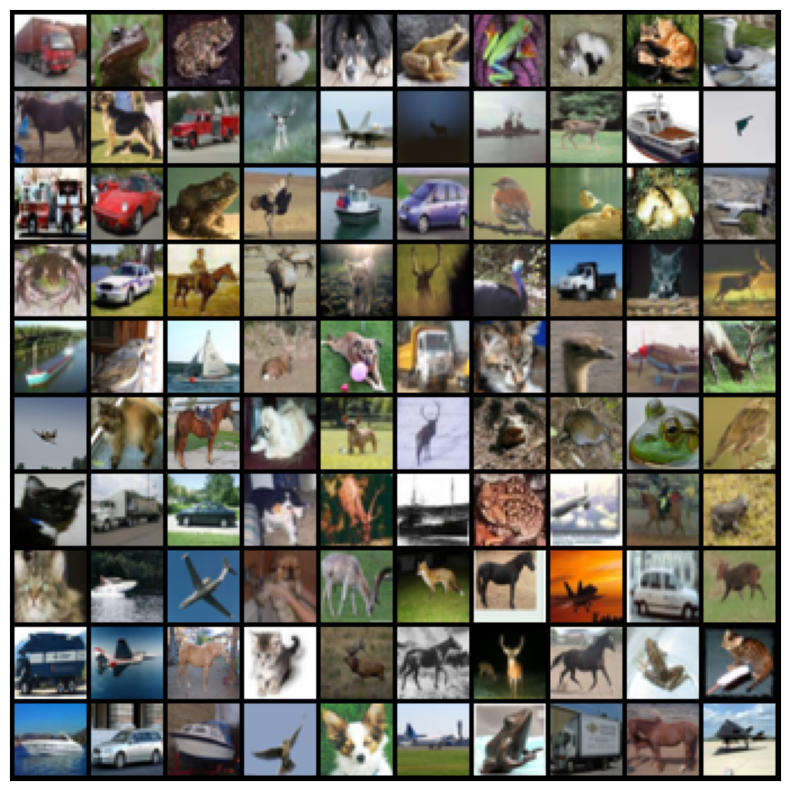

In [9]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, 10).permute(1,2,0))
        break
show_batch(train_dl)

In [10]:
#* Fewer parameters: small set of parameters (the kernel) is used to calculate outputs of the entire image, so the model has much few parameters compared to a fully
# connected layer.
#* Sparsity of connections: in each layer, each output eleent only depends on a small number of input elements, which makes the forward and backward passes more efficient
#* Parameter sharing and spatial invariance: the features learned by a kernel in one part of the image can be used to detect similar
# pattern oin a different part of another image.
#* Max-Pooling layers to progressively decrease the height & width of the output tensors from each convolutional layer.

import torch.nn as nn
import torch.nn.functional as F

simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)
# ?nn.Conv2d
## This for-loop Conv2d layer transforms a 3-channel image to a 16-channel feature map, and the MaxPool2d layer halves the height and width.
## The feature map gets smaller as we add more layers, until we are finally left with a n x 1 x 1 feature map (where n is the # of channels)
## which can be flattened into a vector. Then add a fully connected layer at the end to get a vector size of 10 for each image.

for images, labels in train_dl:
    print('images shape:', images.shape)
    out = simple_model(images)
    print('out shape:', out.shape)
    break

images shape: torch.Size([100, 3, 32, 32])
out shape: torch.Size([100, 8, 16, 16])


In [11]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(),
    nn.Linear(16, 10)
)
model[0]
# Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [12]:
model[0].weight.shape
# torch.Size([16, 3, 3, 3])

torch.Size([16, 3, 3, 3])

In [13]:
for images, labels in train_dl:
    print('images shape:', images.shape)
    out = model(images)
    print('out shape:', out.shape)
    print('First 5 out values:', out[0])
    break
# images shape: torch.Size([100, 3, 32, 32])
# out shape: torch.Size([100, 10])
# First 5 out values: tensor([ 0.2259,  0.1524, -0.1209, -0.1956, -0.2121, -0.2089,  0.1665, -0.0717,
#       0.1493, -0.1593], grad_fn=<SelectBackward0>)

images shape: torch.Size([100, 3, 32, 32])
out shape: torch.Size([100, 10])
First 5 out values: tensor([-0.2095, -0.2127,  0.0834,  0.2290, -0.1148, -0.2088, -0.1458,  0.2233,
        -0.1715,  0.1170], grad_fn=<SelectBackward0>)


In [14]:
F.softmax(out[0], dim=0)
# tensor([0.1270, 0.1180, 0.0898, 0.0833, 0.0819, 0.0822, 0.1196, 0.0943, 0.1176,
#         0.0864], grad_fn=<SoftmaxBackward0>)

tensor([0.0832, 0.0829, 0.1115, 0.1290, 0.0915, 0.0833, 0.0887, 0.1282, 0.0864,
        0.1153], grad_fn=<SoftmaxBackward0>)

In [15]:
probs = F.softmax(out[0], dim=0)
torch.sum(probs), probs
# (tensor(1., grad_fn=<SumBackward0>),
#  tensor([0.1270, 0.1180, 0.0898, 0.0833, 0.0819, 0.0822, 0.1196, 0.0943, 0.1176,
        #  0.0864], grad_fn=<SoftmaxBackward0>))

(tensor(1., grad_fn=<SumBackward0>),
 tensor([0.0832, 0.0829, 0.1115, 0.1290, 0.0915, 0.0833, 0.0887, 0.1282, 0.0864,
         0.1153], grad_fn=<SoftmaxBackward0>))

In [16]:
probs = F.softmax(out[0], dim=0)
torch.max(probs)
# tensor(0.1270, grad_fn=<MaxBackward1>)

tensor(0.1290, grad_fn=<MaxBackward1>)

In [17]:
dataset.classes[9]

'truck'

In [18]:
probs = F.softmax(out[0], dim=0)
dataset.classes[labels[0]]

'dog'

Label:  dog (tensor(5))


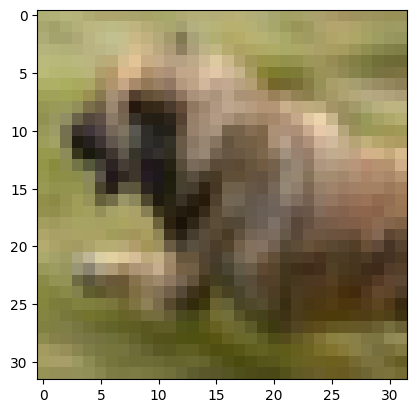

In [19]:
probs = F.softmax(out[0], dim=0)
show_example(images[0], labels[0])

In [20]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device


    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

In [21]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(train_dl, device)
to_device(model, device);

In [22]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_func(preds, yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
    return loss.item(), len(xb), metric_result

def evaluate(model, loss_func, valid_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, xb, yb, metric=metric) for xb, yb in valid_dl]
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [23]:
def fit(epochs, model, loss_fn, train_dl, valid_dl, opt_fn=None, lr=None, metric=None):
  train_losses, val_losses, val_metrics = [], [], []
  if opt_fn is None: opt_fn = torch.optim.SGD #instantiate the optimizer
  opt = opt_fn(model.parameters(), lr=lr)
  for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
      train_loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

    model.eval()
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics.append(val_metric)

    if metric is None:
      print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}'.format(epoch+1, epochs, train_loss, val_loss))
    else:
      print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, train_loss, val_loss, metric.__name__, val_metric))
  return train_losses, val_losses, val_metrics

In [24]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [25]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, valid_dl, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))
#Loss: 2.3132, Accuracy: 0.0992  ~10% accuracy due to randomly initialized model

Loss: 2.3178, Accuracy: 0.0998


In [26]:
num_epochs = 10
opt_fn = torch.optim.Adam
lr = 0.005
history = fit(num_epochs, model, F.cross_entropy, train_dl, valid_dl, opt_fn, lr,  accuracy)
train_losses, val_losses, val_metrics = history
# ...
# Epoch [9/10], train_loss: 1.0943, val_loss: 1.1183, accuracy: 0.6007
# Epoch [10/10], train_loss: 1.0599, val_loss: 1.0766, accuracy: 0.6095

Epoch [1/10], train_loss: 1.5670, val_loss: 1.5799, accuracy: 0.4128
Epoch [2/10], train_loss: 1.4674, val_loss: 1.4401, accuracy: 0.4748
Epoch [3/10], train_loss: 1.2186, val_loss: 1.3493, accuracy: 0.5025
Epoch [4/10], train_loss: 1.3972, val_loss: 1.3162, accuracy: 0.5211
Epoch [5/10], train_loss: 1.1064, val_loss: 1.2622, accuracy: 0.5369
Epoch [6/10], train_loss: 1.4611, val_loss: 1.2751, accuracy: 0.5340
Epoch [7/10], train_loss: 1.0856, val_loss: 1.2524, accuracy: 0.5462
Epoch [8/10], train_loss: 1.3359, val_loss: 1.2810, accuracy: 0.5391
Epoch [9/10], train_loss: 1.1091, val_loss: 1.1915, accuracy: 0.5694
Epoch [10/10], train_loss: 1.1483, val_loss: 1.1458, accuracy: 0.5888


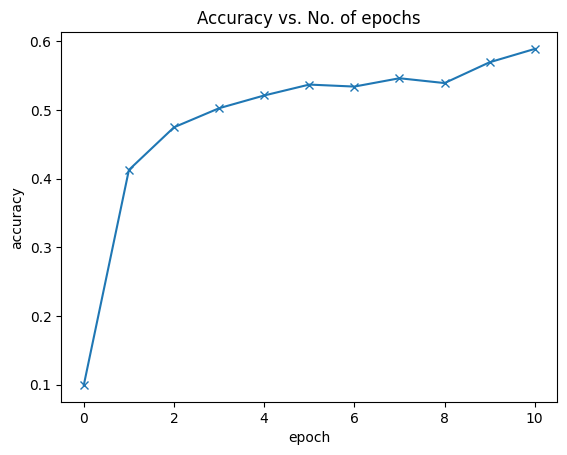

In [27]:
def plot_metric(metric_values):
    plt.plot(metric_values, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_metric([val_acc] + val_metrics)

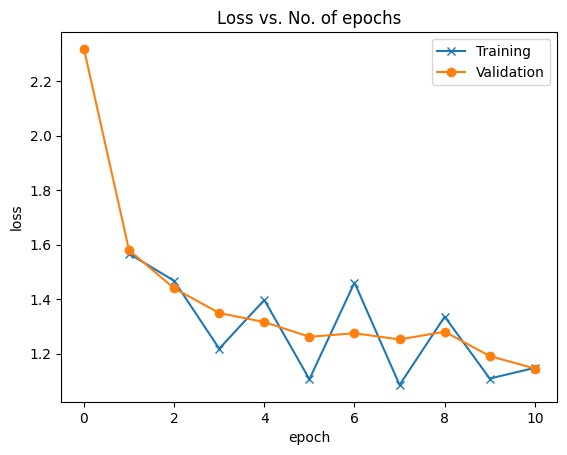

In [28]:

def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, '-x')
    plt.plot(val_losses, '-o')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses([None]+train_losses, [val_loss]+val_losses)

Label: airplane , Predicted: automobile


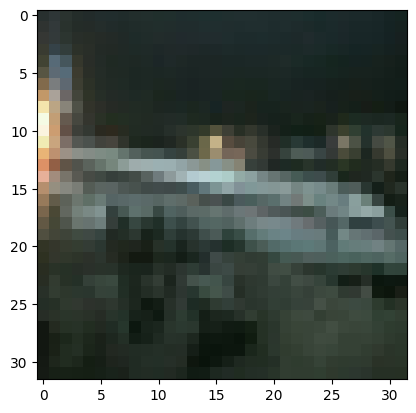

In [29]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

def predict_image(img, model):
  xb = img.unsqueeze(0) #convert to a batch of 1
  yb = model(xb.to(device)) # get predictions form model
  _, preds = torch.max(yb, dim=1) # pick index with highest probability
  return dataset.classes[preds[0].item()] # Retrieve the class label

img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))


Label: automobile , Predicted: automobile


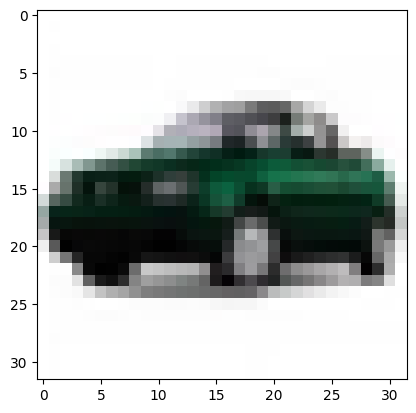

In [30]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


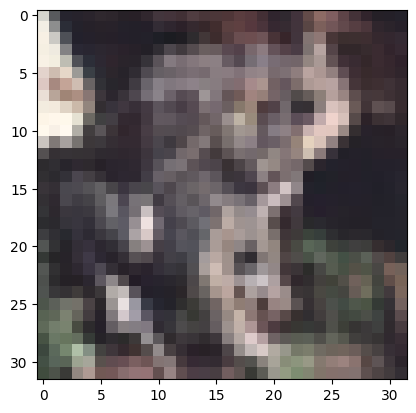

In [31]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [32]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size), device) #, shuffle=False)
test_loss, _, test_acc = evaluate(model, F.cross_entropy, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))


Loss: 1.2035, Accuracy: 0.5687


In [33]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [34]:
model2 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: bs x 16 x 16 x 16

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),  # output: bs x 16 x 8 x 8

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),  # output: bs x 16 x 4 x 4

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),  # output: bs x 16 x 2 x 2

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),  # output: bs x 16 x 1 x 1

    nn.Flatten(), # output: bs x 16
    nn.Linear(16, 10) #output: bs x 10
)

In [35]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))



<ipython-input-35-eb8045ad23c8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('cifar10-cnn.pth'))


<All keys matched successfully>

In [36]:
test_loss, _, test_acc = evaluate(to_device(model2, device), F.cross_entropy, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

# Loss: 1.3012, Accuracy: 0.5281

# FIN

Loss: 1.2035, Accuracy: 0.5687
